<a href="https://colab.research.google.com/github/Francisco2963/PCA/blob/main/PCA_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducción de dimensionalidad / PCA (Core)

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [327]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [328]:
df.duplicated().sum()

240

In [329]:
df.drop_duplicates(inplace=True)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [331]:
df = df.reset_index(drop=True)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [333]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [335]:
def calcular_outliers(df, columna):
  if df[columna].dtype == 'object':
    return None, None, None, None
  else:

   Q1 = df[columna].quantile(0.25)
   Q3 = df[columna].quantile(0.75)
   IQR = Q3 - Q1
   outliers = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
   return outliers, Q1, Q3, IQR

outliers_fixed_acidity, Q1_fixed_acidity, Q3_fixed_acidity, IQR_fixed_acidity = calcular_outliers(df, 'fixed acidity')
outliers_volatile_acidity, Q1_volatile_acidity, Q3_volatile_acidity, IQR_volatile_acidity = calcular_outliers(df, 'volatile acidity')
outliers_citric_acid, Q1_citric_acid, Q3_citric_acid, IQR_citric_acid = calcular_outliers(df, 'citric acid')
outliers_residual_sugar, Q1_residual_sugar, Q3_residual_sugar, IQR_residual_sugar = calcular_outliers(df, 'residual sugar')
outliers_chlorides, Q1_chlorides, Q3_chlorides, IQR_chlorides = calcular_outliers(df, 'chlorides')
outliers_free_sulfur_dioxide, Q1_free_sulfur_dioxide, Q3_free_sulfur_dioxide, IQR_free_sulfur_dioxide = calcular_outliers(df, 'free sulfur dioxide')
outliers_total_sulfur_dioxide, Q1_total_sulfur_dioxide, Q3_total_sulfur_dioxide, IQR_total_sulfur_dioxide = calcular_outliers(df, 'total sulfur dioxide')
outliers_density, Q1_density, Q3_density, IQR_density = calcular_outliers(df, 'density')
outliers_pH, Q1_pH, Q3_pH, IQR_pH = calcular_outliers(df, 'pH')
outliers_sulphates, Q1_sulphates, Q3_sulphates, IQR_sulphates = calcular_outliers(df, 'sulphates')
outliers_alcohol, Q1_alcohol, Q3_alcohol, IQR_alcohol = calcular_outliers(df, 'alcohol')
outliers_quality, Q1_quality, Q3_quality, IQR_quality = calcular_outliers(df, 'quality')

print(f'Outliers en fixed acidity: \n{len(outliers_fixed_acidity)}')

print(f'Outliers en volatile acidity: \n{len(outliers_volatile_acidity)}')

print(f'Outliers en citric acid: \n{len(outliers_citric_acid)}')

print(f'Outliers en residual sugar: \n{len(outliers_residual_sugar)}')

print(f'Outliers en chlorides: \n{len(outliers_chlorides)}')

print(f'Outliers en free sulfur dioxide: \n{len(outliers_free_sulfur_dioxide)}')

print(f'Outliers en total sulfur dioxide: \n{len(outliers_total_sulfur_dioxide)}')

print(f'Outliers en density: \n{len(outliers_density)}')

print(f'Outliers en pH: \n{len(outliers_pH)}')

print(f'Outliers en sulphates: \n{len(outliers_sulphates)}')

print(f'Outliers en alcohol: \n{len(outliers_alcohol)}')

print(f'Outliers en quality: \n{len(outliers_quality)}')



Outliers en fixed acidity: 
41
Outliers en volatile acidity: 
19
Outliers en citric acid: 
1
Outliers en residual sugar: 
126
Outliers en chlorides: 
87
Outliers en free sulfur dioxide: 
26
Outliers en total sulfur dioxide: 
45
Outliers en density: 
35
Outliers en pH: 
28
Outliers en sulphates: 
55
Outliers en alcohol: 
12
Outliers en quality: 
27


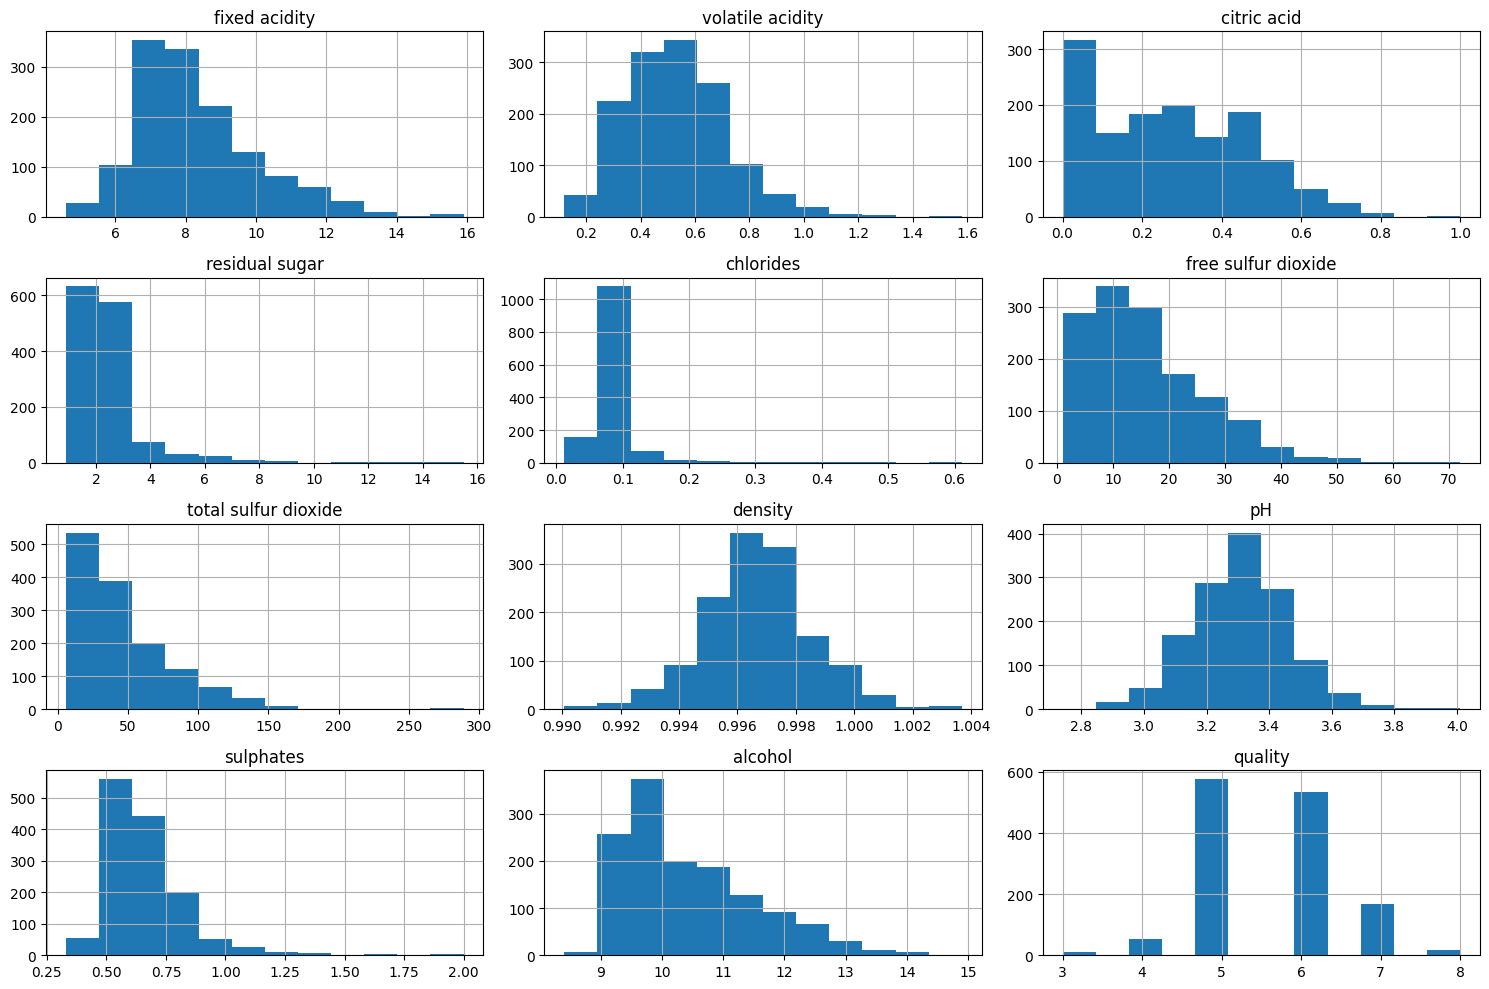

In [336]:
df.hist(bins=12,figsize=(15,10))
plt.tight_layout()
plt.show()

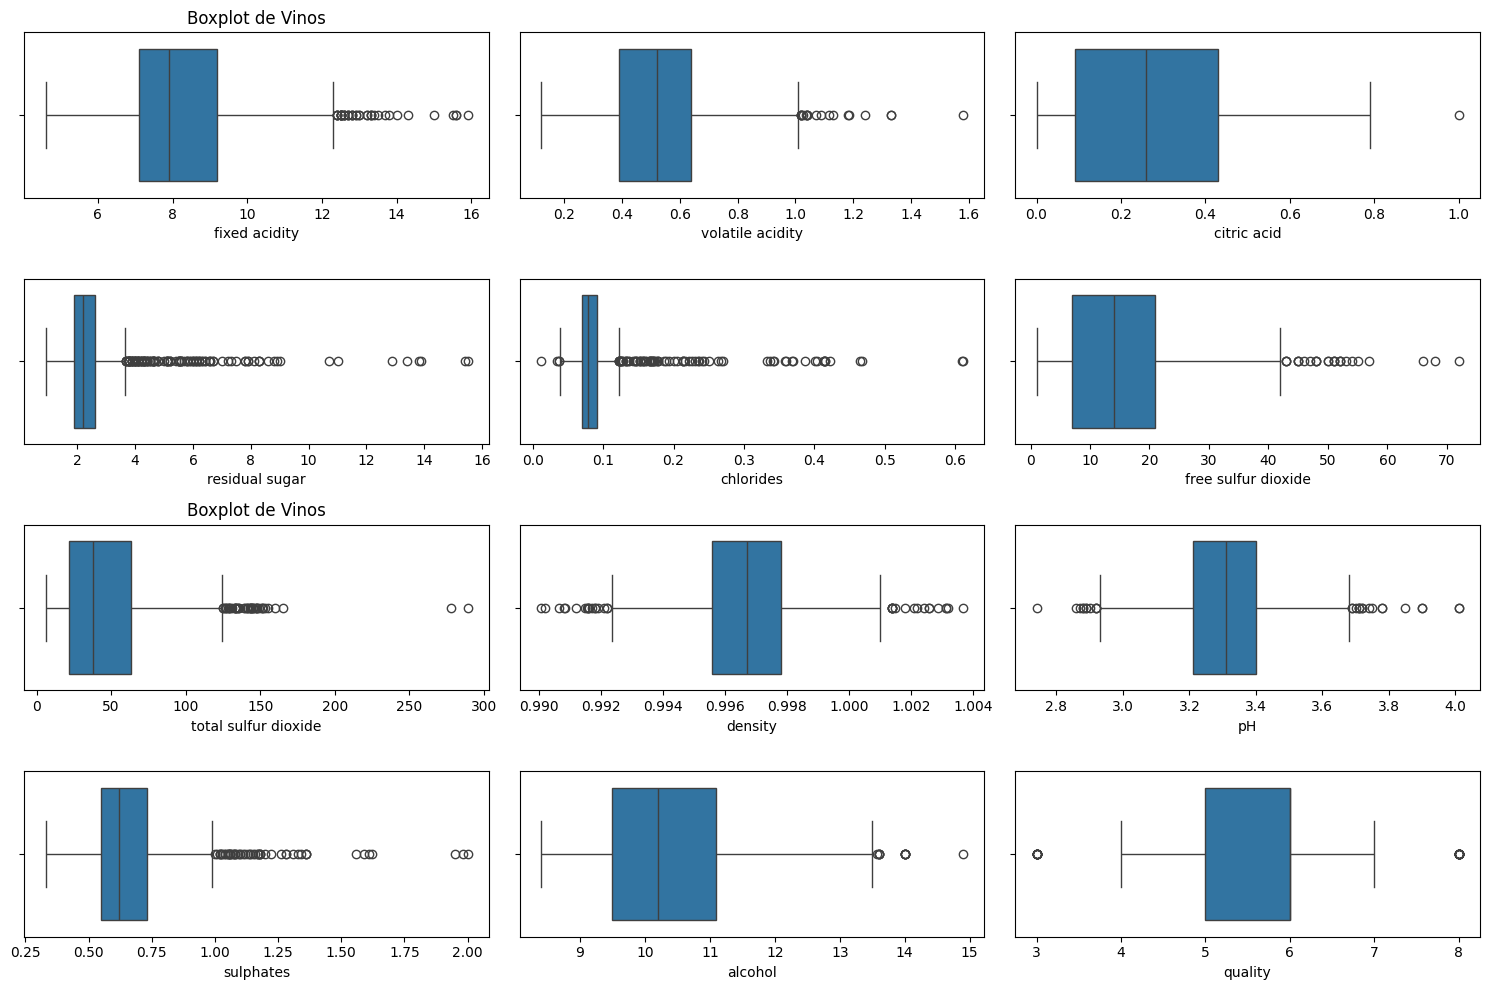

In [337]:
plt.figure(figsize=(15,10))

plt.subplot(4, 3, 1)
sns.boxplot(x=df['fixed acidity'])
plt.title('Boxplot de Vinos')
plt.xlabel('fixed acidity')

plt.subplot(4,3,2)
sns.boxplot(x=df['volatile acidity'])
plt.xlabel('volatile acidity')

plt.subplot(4,3,3)
sns.boxplot(x=df['citric acid'])
plt.xlabel('citric acid')

plt.subplot(4,3,4)
sns.boxplot(x=df['residual sugar'])
plt.xlabel('residual sugar')

plt.subplot(4,3,5)
sns.boxplot(x=df['chlorides'])
plt.xlabel('chlorides')

plt.subplot(4,3,6)
sns.boxplot(x=df['free sulfur dioxide'])
plt.xlabel('free sulfur dioxide')

plt.subplot(4, 3, 7)
sns.boxplot(x=df['total sulfur dioxide'])
plt.title('Boxplot de Vinos')
plt.xlabel('total sulfur dioxide')

plt.subplot(4,3,8)
sns.boxplot(x=df['density'])
plt.xlabel('density')

plt.subplot(4,3,9)
sns.boxplot(x=df['pH'])
plt.xlabel('pH')

plt.subplot(4,3,10)
sns.boxplot(x=df['sulphates'])
plt.xlabel('sulphates')

plt.subplot(4,3,11)
sns.boxplot(x=df['alcohol'])
plt.xlabel('alcohol')

plt.subplot(4,3,12)
sns.boxplot(x=df['quality'])
plt.xlabel('quality')

plt.tight_layout()
plt.show()

COMENTARIO

Despues de revisar literatura en internet sobre los componentes en la elavoracion del vino, he decidido no eliminar los outliers, ya que, si bien hay algunas variables que tienen  outliers como por ejemplo la variable fixed acidity 41, volatile acidity con 19 outliers, la acidez en el vino es fundamental para la elaboracion del producto. En nuestro DataFrame, estos valores atipicos podrian estar explicados con la puntuacion del vino, por lo tanto podrian haber vinos de muy buena calidad y otros con muy baja calidad en donde la acidez juegue un factor importante.

Misma situacion para residual sugar con 126 outliers

literatura revisada:

https://www.vinetur.com/2018022346325/por-que-es-tan-importante-la-acidez-del-vino.html

https://www.encopadebalon.com/blogs/news/el-azucar-en-el-vino

In [338]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [339]:
df['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [340]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [341]:
df['residual sugar'].unique()

array([ 1.9 ,  2.6 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,
        3.9 ,  1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,
        1.5 ,  5.9 ,  2.8 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,
        4.  ,  7.  ,  6.4 ,  3.5 , 11.  ,  3.65,  4.5 ,  4.8 ,  2.95,
        5.8 ,  6.2 ,  4.2 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,  2.15,  5.2 ,
        2.55, 15.5 ,  4.1 ,  8.3 ,  6.55,  4.6 ,  4.3 ,  5.15,  6.3 ,
        6.  ,  8.6 ,  7.5 ,  2.25,  4.25,  2.85,  3.45,  2.35,  2.65,
        9.  ,  8.8 ,  5.  ,  1.65,  2.05,  0.9 ,  8.9 ,  8.1 ,  4.7 ,
        1.75,  7.8 , 12.9 , 13.4 ,  5.4 , 15.4 ,  3.75, 13.8 ,  5.7 ,
       13.9 ])

In [342]:
# 1. Agrupación por calidad y presencia de azucar residual y cálculo de conteos
grouped_data = df.groupby(['quality', 'residual sugar']).size().reset_index(name='count')
grouped_data

,quality,residual sugar,count
0,3,1.2,1
1,3,1.5,1
2,3,1.8,1
3,3,2.1,3
4,3,2.2,1
...,...,...,...
202,8,2.6,1
203,8,2.8,1
204,8,3.6,1
205,8,5.2,1


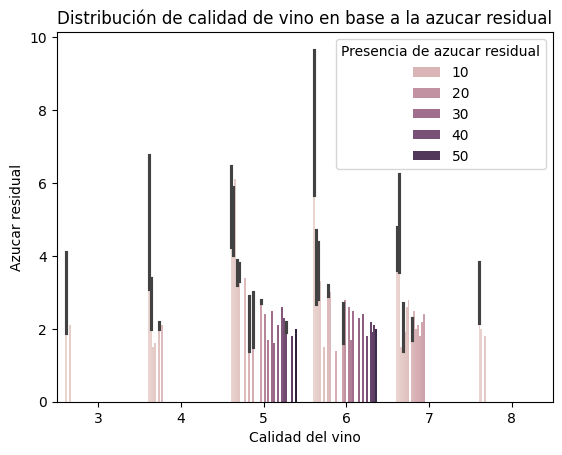

In [343]:
# Creación del gráfico de barras
sns.barplot(x='quality', y='residual sugar', hue='count', data=grouped_data)
plt.title('Distribución de calidad de vino en base a la azucar residual')
plt.xlabel('Calidad del vino')
plt.ylabel('Azucar residual')
plt.legend(title='Presencia de azucar residual')

plt.show()

In [344]:
correlation_matrix = df[["residual sugar","alcohol","quality"]].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                residual sugar   alcohol   quality
residual sugar        1.000000  0.063281  0.013640
alcohol               0.063281  1.000000  0.480343
quality               0.013640  0.480343  1.000000


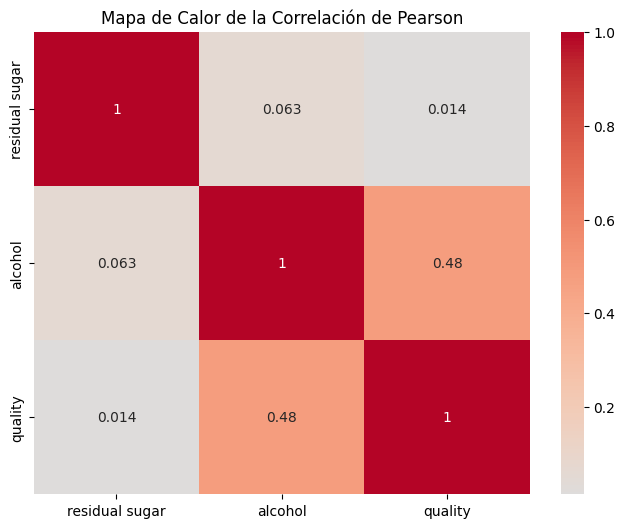

In [345]:
# Crear mapas de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

In [346]:
correlation_matrix = df[["fixed acidity","volatile acidity","citric acid","residual sugar",
                               "chlorides","free sulfur dioxide","total sulfur dioxide",
                               "density","pH","sulphates","alcohol","quality"]].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur di

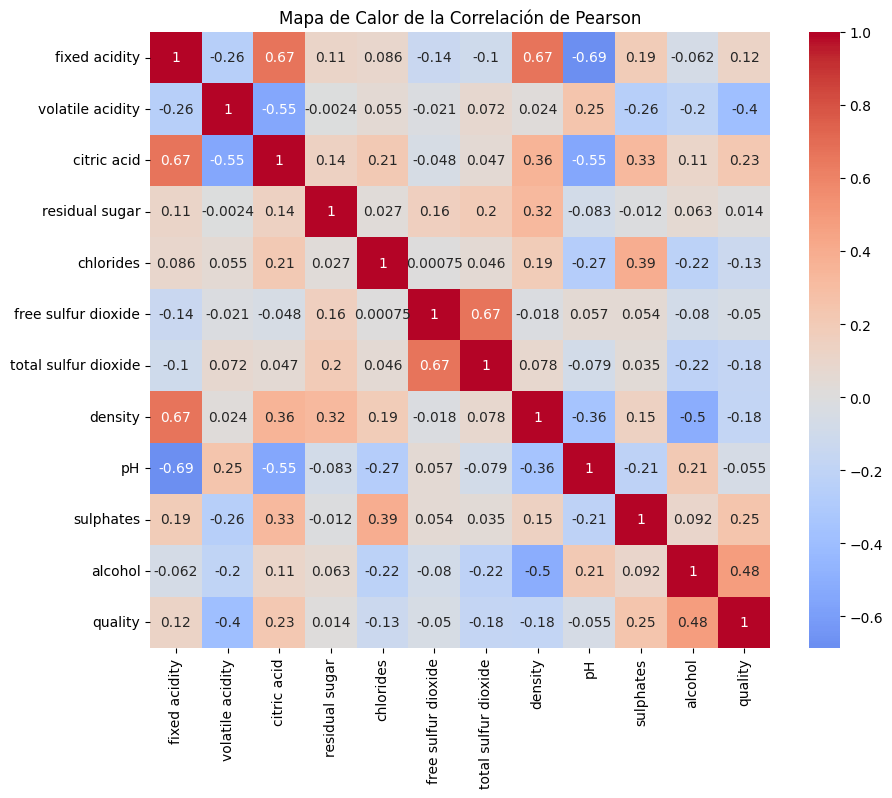

In [347]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

# PREPROCESAMIENTO

In [348]:
!pip install dask[dataframe]

In [349]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [351]:
y = df['quality']
X = df.drop(['quality'], axis = 1)

In [352]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [353]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1354,6
1355,5
1356,6
1357,5


In [354]:
# Verificar los valores únicos en y (varible objetivo)
valores_unicos = np.unique(y)
print(valores_unicos)

[3 4 5 6 7 8]


In [355]:
label = LabelEncoder()
y = label.fit_transform(y)

In [356]:
# Verificar los valores únicos depsues de escalar en y (varible objetivo)
valores_unicos = np.unique(y)
print(valores_unicos)

[0 1 2 3 4 5]


# Reduccion de dimensionalidad

In [360]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [361]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

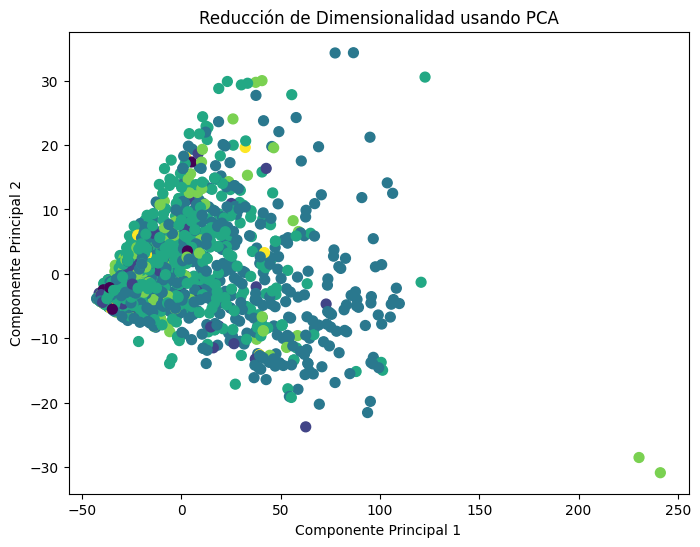

In [362]:
# Visualización de PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("Reducción de Dimensionalidad usando PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [363]:
# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

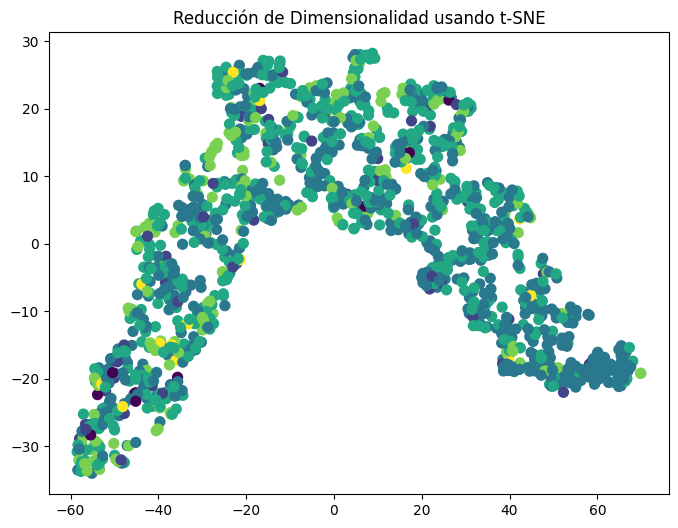

In [364]:
# Visualización de t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50)
plt.title("Reducción de Dimensionalidad usando t-SNE")
plt.show()

In [382]:
# Aplicar LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

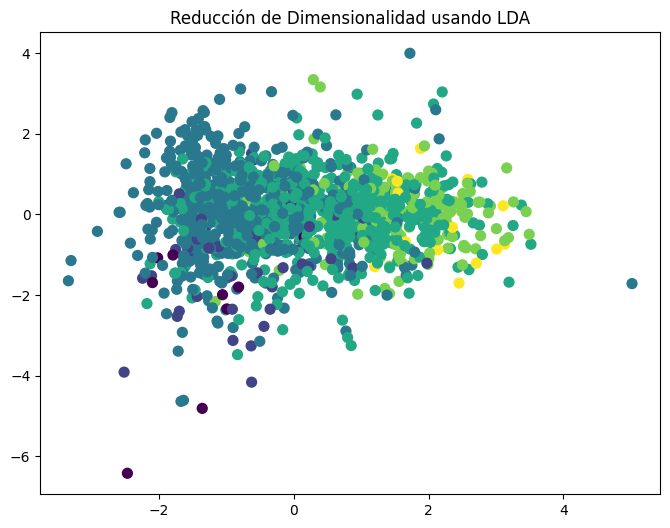

In [383]:
# Visualización de LDA
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', s=50)
plt.title("Reducción de Dimensionalidad usando LDA")
plt.show()

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [366]:
# Instanciar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

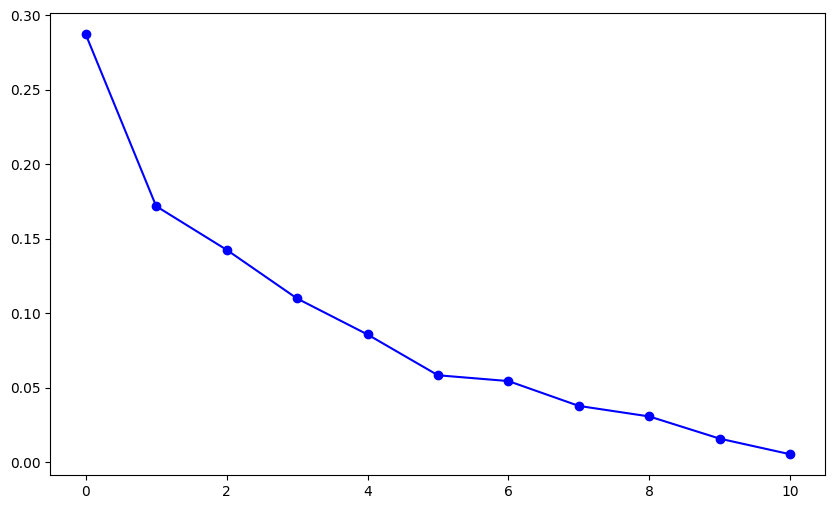

In [367]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10,6))
plt.plot(pca.explained_variance_ratio_,'bo-')
plt.show()

In [368]:
pca.n_features_in_

11

In [369]:
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train)

print("El número de componentes es", pca.n_components_, "de", pca.n_features_in_)

El número de componentes es 7 de 11


In [370]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


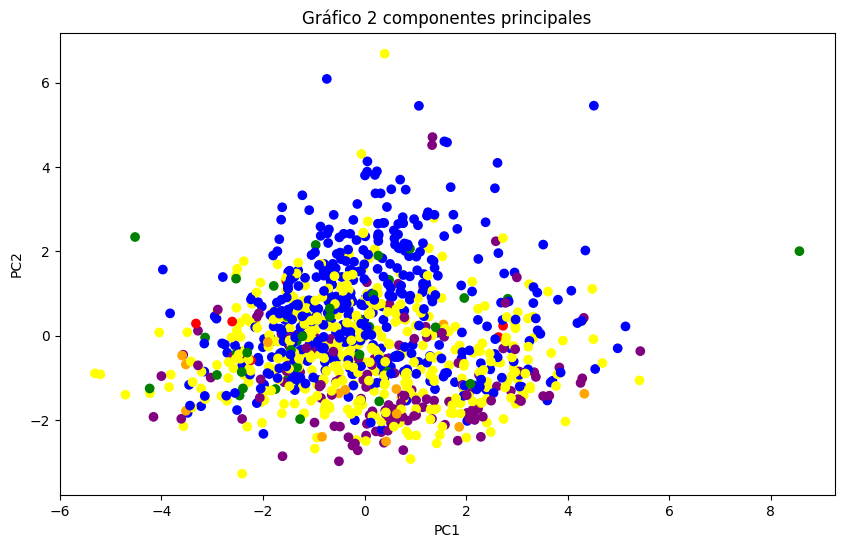

In [371]:
# Convertir y_train a pandas Series para usar map
y_train_series = pd.Series(y_train)

# Mapeo de colores para todas las clases (0, 1, 2, 3, 4, 5)
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'purple', 5: 'orange'}
color_map = y_train_series.map(colors)

# Filtrar los registros donde el color_map no es NaN (en caso de que existan valores no mapeados)
mask = color_map.notna()
filtered_X_train_pca = X_train_pca[mask]
filtered_color_map = color_map[mask]

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(filtered_X_train_pca[:, 0], filtered_X_train_pca[:, 1], c=filtered_color_map)
plt.title('Gráfico 2 componentes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [372]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [373]:
y = df['quality']
X = df.drop(['quality'], axis = 1)

In [374]:
# Verificar los valores únicos en y (varible objetivo)
valores_unicos = np.unique(y)
print(valores_unicos)

[3 4 5 6 7 8]


In [375]:
label = LabelEncoder()
y = label.fit_transform(y)

In [376]:
# Verificar los valores únicos despues de escalar en y (varible objetivo)
valores_unicos = np.unique(y)
print(valores_unicos)

[0 1 2 3 4 5]


In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [378]:
# Instanciar Escalador Estándar
scaler = StandardScaler()

In [379]:
# Ajustar y transformar datos
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=10) # Prueba cambiando el número de componentes!!
X_train_pca = pca.fit_transform(X_train)
X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca = pca.transform(X_test)
X_test_pca_df = pd.DataFrame(X_test_pca)

X_train_pca_df

,0,1,2,3,4,5,6,7,8,9
0,-0.821963,-0.165969,-0.666743,0.339780,0.063975,1.521294,-0.499930,0.265248,-0.247904,0.093661
1,-0.273415,0.480543,0.617985,-0.433291,1.542504,-0.241424,-0.273739,-0.710090,-0.672125,0.033533
2,1.155309,1.165982,2.259787,0.371551,-1.229631,0.356613,-0.125359,0.828265,-0.340998,0.165883
3,-1.306497,1.546593,-0.035627,-0.062263,-0.137496,0.881351,-0.386199,0.239383,-0.359404,-0.892551
4,-1.353976,1.426728,-0.538145,0.073844,-0.007463,0.677345,-0.180914,0.092243,-0.507069,-0.793302
...,...,...,...,...,...,...,...,...,...,...
1082,0.095792,0.506434,-0.380883,0.295988,-0.585946,0.160869,-0.064013,-0.444827,-1.103107,0.009770
1083,2.884754,-1.475689,-0.372702,-0.551401,-0.258210,0.088848,0.522877,0.483685,-0.077179,-0.336808
1084,0.288414,-1.557191,0.783165,-2.206051,2.225404,-0.581695,-0.892360,-0.722523,-0.050255,0.304152
1085,-0.481796,0.031919,1.669342,1.131315,0.043517,1.636887,-0.358550,-0.474703,-0.118556,0.093252


In [380]:
%%time
# Sin PCA
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)


CPU times: user 43.2 ms, sys: 0 ns, total: 43.2 ms
Wall time: 43.1 ms


0.5808823529411765

In [381]:
%%time
# Con PCA
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

logreg_pca.score(X_test_pca, y_test)

CPU times: user 34.3 ms, sys: 856 µs, total: 35.2 ms
Wall time: 34.7 ms


0.5845588235294118